# Machine Learning for Classification

## Churn Prediction

In this exercise we will be working for a telco and we want to classify our customes based on a churn prediction (a percentage). This can be used to send promotions to those customers that have a high churn percentage.

In this particular case we will be using **Binary Classification**. Because we want to classify using two categories. In our case the y is either 0 or 1 (no churn, churn)

The output of this model (g(Xi)) is a number between 0 and 1 (This a churn probability)

The way we can do this is by taking last month customers and assign a 0 to the users that didn't leave and 1 to the users that left. And then we can check data related to the customers like the type of contracts.



## Data Preparation

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

# First we take a look at the columns
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(n=5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# If we have a lot of columns we can Transpose the DataFrame to take a look at all the columns without scrolling
df.head(n=5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
# Standarize the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# We list the categorical columns
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# And for each categorical column we standarize the contents of each row
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.head(n=5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [4]:
# When we check the types we notice a few weird things.
# seniorcitizen is an int, thats ok is 0/1 instead of yes/no
# totalcharges is an object, this is weird we should take a look
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [5]:
# When we check totalcharges, looks like its a number but the dtype is object
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [6]:
# If we try to convert to numeric we get an error, so there are some not numeric values
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

In [7]:
# We can add errors='coerce' to pd.to_numeric (this will make it ignore the errors)
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [8]:
# And the values that where not numbers are left as null
tc.isnull().sum()

np.int64(11)

In [9]:
# And if we check the values that are null we notice that for those the value is '_' so thats why those were object
# Those proably where whitespaces and we replaced whitespaces with '_'
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [10]:
# Ok so we convert the totalcharges to a numeric value and fill the null values with 0
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce').fillna(0)
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [11]:
# Now we dont have nulls
df.totalcharges.isnull().sum()

np.int64(0)

In [12]:
# We check the churn column
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [13]:
# We are going to transform the yes/no to 1/0
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [14]:
# This line replaces the churn column with 1/0
df.churn = (df.churn == 'yes').astype(int)
df.head()

df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# Setting Up The Validation Framework

As we did before we want to split the data set using 60% for training, 20% for validation and 20% for testing. We did this with pandas before but this time we want to do it with Scikit-Learn

In [15]:
from sklearn.model_selection import train_test_split

# train_test_split?

# Splits data in two parts so 80% | 20%
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

len(df_full_train), len(df_test)

(5634, 1409)

In [16]:
# We need to split df_full_train again in two parts 75% | 25% to actually get the original dataset divided into 60%, 20%, 20%
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [17]:
# We reset the indexes (This is not needed)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
# We extract our y
y_train = df_train.churn
y_val = df_val.churn
y_test = df_test.churn

In [19]:
# And we delete the churn variables from our datasets

# del df_train["churn"]
df_train = df_train.drop(columns=['churn'])

# del df_val["churn"]
df_val = df_val.drop(columns=['churn'])

# del df_test["churn"]
df_test = df_test.drop(columns=['churn'])

# EDA (Exploratory Data Analysis)

- Check missing values
- Look at the target variable (churn)
- Look at the numerical and categorical variables

In [20]:
# We will use df_full_train

# We reset the index (not needed)
df_full_train = df_full_train.reset_index(drop=True)

# We check if we have missing values...
# We don't have any missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
# We want to check how many clients have churn
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [22]:
# If we want to get a percentage (churn rate)
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [23]:
# But we can get the churn rate with the mean
# It works because we only have 0 and 1
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [24]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2) # Clients are churning at 27%

np.float64(0.27)

In [25]:
# We check the types to determine numerical and categorical columns (seniorcitizen is an int64 but is a categorical value)
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [26]:
# We can create a list of the columns that are numerical
numerical = ['tenure', 'monthlycharges', 'totalcharges']

# And we create a list of the columns that are categorical (we remove customerid because is an id not a category)
categorical = [c for c in list(df.columns) if c not in numerical + ['customerid']]

In [27]:
# We get the count of unique values for categorical columns (to see how many categories each column haves)
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
churn               2
dtype: int64

# Feature importance: Churn rate and risk ration

Feature importance analysis (part of EDA) - identifying which features affect our target variable
- Churn rate
- Risk ration
- Mutual information - later

In [28]:
# Churn rate
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [29]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

np.float64(0.26996805111821087)

In [30]:
female_churn_rate = df_full_train[df_full_train.gender == 'female'].churn.mean()
female_churn_rate

np.float64(0.27682403433476394)

In [31]:
# female churn rate is slightly greater than global churn rate (but is almost the same)
global_churn_rate - female_churn_rate

np.float64(-0.006855983216553063)

In [32]:
male_churn_rate = df_full_train[df_full_train.gender == 'male'].churn.mean()
male_churn_rate

np.float64(0.2632135306553911)

In [33]:
# male churn rate is slightly lower than global churn rate (but almost the same)
global_churn_rate - male_churn_rate

# gender doesn't seem that important for churn rate

np.float64(0.006754520462819769)

In [34]:
with_partner_churn_rate = df_full_train[df_full_train.partner == 'yes'].churn.mean()
with_partner_churn_rate

np.float64(0.20503330866025166)

In [35]:
# having a partner lowers the posibility of churn rate on almost 7%
global_churn_rate - with_partner_churn_rate

np.float64(0.06493474245795922)

In [36]:
without_partner_churn_rate = df_full_train[df_full_train.partner == 'no'].churn.mean()
without_partner_churn_rate

np.float64(0.3298090040927694)

In [37]:
# Not having a partner increases the churn rate on almost 6%
# Having a partner seems more important than the gender
global_churn_rate - without_partner_churn_rate

# <0 more likely to churn
# >0 less likely to churn

np.float64(-0.05984095297455855)

In [38]:
# Risk ratio

# clients with partner are less likely to churn
with_partner_churn_rate / global_churn_rate

np.float64(0.7594724924338315)

In [39]:
# clients without parter are more likely to churn
without_partner_churn_rate / global_churn_rate

# >1 more likely to churn
# <1 less likely to churn

np.float64(1.2216593879412643)

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [40]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [41]:
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [42]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [43]:
from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()


gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121



churn


,mean,count,diff,risk
churn,,,,
0,0.0,4113,-0.269968,0.000000
1,1.0,1521,0.730032,3.704142


# Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another.

[Mutual Information](https://en.wikipedia.org/wiki/Mutual_information)

We will use sklearn for this.

In [44]:
from sklearn.metrics import mutual_info_score

In [45]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

np.float64(0.0983203874041556)

In [46]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.0983203874041556)

In [47]:
mutual_info_score(df_full_train.gender, df_full_train.churn) # 0.0011 gender is not informative at all

np.float64(0.0001174846211139946)

In [48]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

# It seems contract is more important than partner

np.float64(0.009967689095399745)

In [49]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

categorical = [c for c in categorical if c != 'churn']

mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature importance: Correlation

How about numerical columns?

- Correlation coefficient ([Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient))

For values between 0.0 to -0.2 or between 0.0 to 0.2 the correlation is low (rarely)

For values between -0.2 to -0.5 or between 0.2 to 0.5 the correlation is moderate (sometimes)

For values between -0.5 to -1.0 or between 0.5 to 1.0 the correlation is strong (often/always)

In [50]:
df_full_train[numerical].corrwith(df_full_train.churn)

# tenure and totalcharges have negative correlation
# tenure: this means that the longer the client has being with the company the less likely is churn
# totalcharges: is probably negative because of tenure

# monthly charges have positive correlation
# montlycharges: this means that if clients pay more is more likely to churn

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [51]:
# Here we can see if clients have been with the company less than 2 months the churn rate is 59%
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [52]:
# If clients have been with the company more than two months and less that one year the churn rate is 39%
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [53]:
# If clients have been with the company more than one year the churn rate falls to 17%
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [54]:
# If clients pay less than $20 the have an 8% churn rate
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [55]:
# If clients pay more than 20 and less than 50 then the churn rate is 18%
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [56]:
# And if clients pay more than 50 then the churn rate is 32%
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

In [57]:
# Here we can see the variables in order of correlation so tenure is the most important, followed by monthlycharnges and totalcharges is in last place
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# One-hot encoding
- Use Scikit-Learn to encode categorical features
- Create a table of 0 and 1 for each categorical column

In [58]:
from sklearn.feature_extraction import DictVectorizer

In [59]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [60]:
# dicts = df_train[['gender', 'contract']].iloc[:10].to_dict(orient='records')
dicts =df_train[['gender', 'contract']].to_dict(orient='records') 
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [61]:
# dv = DictVectorizer()
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [62]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [63]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.]])

In [64]:
# DictVectorizer is smart enough to make a difference between categorical and numerical columns
dicts =df_train[['gender', 'contract', 'tenure']].to_dict(orient='records') 
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [65]:
# It leaves categorical columns untouched
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       ...,
       [ 1.,  0.,  0.,  0.,  1.,  2.],
       [ 0.,  0.,  1.,  1.,  0., 27.],
       [ 1.,  0.,  0.,  1.,  0.,  9.]])

In [66]:
# So we can send all the columns to the vectorizer

# First we need to create a dictionary using our data
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

# Then we create a vectorizer (we pass sparse False for it to create a numpy array instead of a sparse list)
dv = DictVectorizer(sparse=False)
# And then fit our vectorizer
dv.fit(train_dicts)
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [67]:
# X_train = dv.transform(train_dicts)

# This one fits an transforms at the same time (could be used to replace the .fit and do it with a single instruction)
# X_train = dv.fit_transform(train_dict)

# X_train = DictVectorizer(sparse=False).fit_transform(train_dicts)
X_train = dv.fit_transform(train_dicts)
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [68]:
# And we can do the same with the validation dataframe

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val

# Now we have the feature matrixes for train and validation and are ready to train our model


array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

# Logistic regression

- Binary classification
- Linear vs logistic regression

Binary classification is something that we can solve with logistic regression.

g(Xi) gives us a number between 0 and 1. We can treat this number as a probability.

Linear regression gives us a number between -Infinity and Infinity. But Logistic regression will give us a number betwen 0 and 1.

Logistic regression uses the same expression of linear regression but uses a sigmoid function to keep the values of linear regression between 0 and 1.

In [69]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [73]:
z = np.linspace(-7, 7, 51)
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

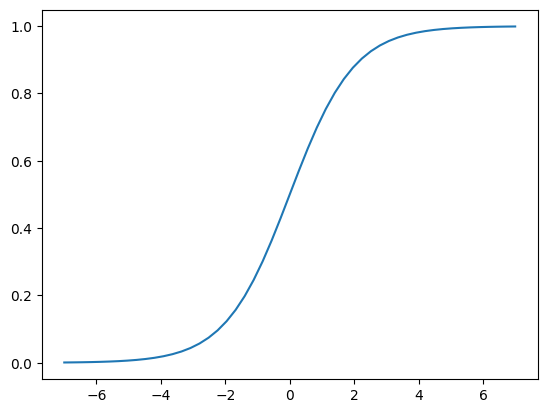

In [74]:
from matplotlib import pyplot as plt
plt.plot(z, sigmoid(z))

No matter how large the number the result of sigmoid will always be between 0 and 1. And we can use sigmoid to change a score (the result of linear regression) into a probability.

In [75]:
w0 = 1 # w0 and w come from our training
w = []

# Linear Regression
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    return result

# Logistic Regression
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

Both Linear regression and logistic regression are known as linear models.

# Training logistic regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [76]:
# from sklearn.linear_model import Ridge # Ridge is regularized linear regression
from sklearn.linear_model import LogisticRegression

In [77]:
# We initialize a model
model = LogisticRegression()

# We train a model
model.fit(X_train, y_train)

/Users/kasteion/repos/kasteion/machine-learning-zoomcamp/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
# This is w0
model.intercept_[0]

np.float64(-0.10903233761520867)

In [79]:
# This is w (aka the weights aka the coeficients)
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [81]:
# And we can predict like this
model.predict(X_train) # Hard predictions (Already have the exact label)

array([0, 1, 1, ..., 1, 0, 1])

In [82]:
# Or predict like this (this will give us a probability instead of a 0 | 1)
model.predict_proba(X_train) # Soft prediction (A probability) [prob_not_churn, prob_churn]

array([[0.90453528, 0.09546472],
       [0.32065254, 0.67934746],
       [0.36629999, 0.63370001],
       ...,
       [0.4683847 , 0.5316153 ],
       [0.95745236, 0.04254764],
       [0.30125369, 0.69874631]])

In [83]:
# Like this we can get only the churn probability because predict_proba return the not churn probability and the churn probability
model.predict_proba(X_train)[:, 1] # This is just the churn probability

array([0.09546472, 0.67934746, 0.63370001, ..., 0.5316153 , 0.04254764,
       0.69874631])

In [87]:
# Like this we can get the predictions of the validation data set
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899642, 0.20452408, 0.21222814, ..., 0.13639227, 0.79978374,
       0.83741783])

In [89]:
# And then we can decide the percentage that we will consider a 1 (and if that is not met it will be 0)
churn_decision = (y_pred > 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [91]:
# So we could say that this are the customers that will get an email discount
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [92]:
# For linear regression we use rmsc 
# For logistic regression we can use something similar called accuracy

# In this case the mean will be the accuracy of our model
(y_val == churn_decision).mean() # 80% of our prediction matched

np.float64(0.8034066713981547)

In [95]:
# Its something like this:
# We have a dataframe with the probability, prediction, the real values and the ones that matched
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008996,0,0,True
1,0.204524,0,0,True
2,0.212228,0,0,True
3,0.543073,1,1,True
4,0.213793,0,0,True
...,...,...,...,...
1404,0.313662,0,0,True
1405,0.039358,0,1,False
1406,0.136392,0,0,True
1407,0.799784,1,1,True


In [96]:
# And having that we can check the percentage of correct predictions against the validation dataframe
df_pred.correct.mean()

np.float64(0.8034066713981547)

# Model interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [97]:
# This are the names of the features
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [98]:
# And this are the coeficients
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [101]:
# By joining the names and coeficients we can take a look at the weight of each feature
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.475),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.141),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.266),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [105]:
# Because we have to much data we can train a smaller model
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records')


[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [106]:
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_val[small].to_dict(orient='records')

In [107]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [108]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [110]:
X_train_small = dv_small.transform(dict_train_small)
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)


LogisticRegression()

In [117]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575982672735)

In [118]:
w = model_small.coef_[0]
w

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [116]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [119]:
# This would be the probability for a customer to churn if 
# Is on a month-to-month contract
# Pays $50 a month (monthlycarges)
# And has been a customer for 5 months (tenure)
sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * -0.036)

np.float64(0.41824062315816374)

# Using the Model

In [121]:
# Get the big model with all the features and train whe model using the full_train data

# We need to get the dictionaries
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

# Now we need to create the DictVectorizer
dv = DictVectorizer(sparse=False)
# And fit and transform our feature matrix
X_full_train = dv.fit_transform(dicts_full_train)

# We can get our results
y_full_train = df_full_train.churn.values

# And we can fit (aka train) our model
model = LogisticRegression()
model.fit(X_full_train, y_full_train)


/Users/kasteion/repos/kasteion/machine-learning-zoomcamp/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
# Now we can get the dictionary for the test data
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

# And transfrom our feature matrix for the test data
X_test = dv.transform(dicts_test)

# And now we can predict the probabilities
y_pred = model.predict_proba(X_test)[:, 1]

# We can get our churn decision
churn_decision = (y_pred >= 0.5)

# And measure the accuracy of our predictions (The accuracy is 81%, this model is a little bit more accurate, maybe because we used more data)
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

Now, lets see how we can use this

In [134]:
# Lets take any customer from our dataset
# We will get the data in a dictionary (let's say if if comes from a web service or something)
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [135]:
# We need the feature matrix for our customer
X_customer = dv.transform(customer)
X_customer

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [136]:
model.predict_proba(X_customer)[0, 1]

np.float64(0.49406220241307963)

In [137]:
y_test[10]

np.int64(0)

In [147]:
customer = dicts_test[-1]
X_customer = dv.transform(customer)
model.predict_proba(X_customer)[0, 1], list(y_test)[-1] # This customer might churn



(np.float64(0.6459005940088463), 1)

In [157]:
customer = dicts_test[12]
X_customer = dv.transform(customer)
model.predict_proba(X_customer)[0, 1], list(y_test)[12] # This customer might churn

(np.float64(0.7384194898830041), 1)

# Summary

- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with DictVectorizer
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similiar to linear regression

## Explore more

More things

* Try to exclude least useful features

Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge
* There are other ways to implement one-hot encoding. E.g. using the `OneHotEncoding` class. Check how to use it [here](notebook-scaling-ohe.ipynb).
* Sometimes numerical features requeire scaling, especially for iterative solves like "lbfgs". Check how to use `StandardScaler` for that [here](notebook-scaling-ohe.ipynb).


Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
